# Grafica de Stacked Area Plot

In [240]:
class StackedAP():
    """
    Un gráfico de Stacked Area es la extensión de un gráfico de área básico para mostrar la evolución del valor 
    de varios grupos en el mismo gráfico. Los valores de cada grupo se muestran uno encima del otro.
    Permite verificar en la misma figura la evolución tanto del total de una variable numérica,
    como la importancia de cada grupo.
    
    Esta clase nos permite automatizar la configuracion de uno o varios Stacked Area Plots en un solo lienzo, 
    facilitando la debida personalizacion de cada grafico.
    
    Args:
    x: es el rango del eje x de cada subplot
    y: son los valores del eje y de cada subplot
    param: es un diccionario que contiene todos los parametros que podemos modificar de la grafica
    nrows: es el numero de renglones que tiene nuestra matriz de graficas
    ncols: es el numero de columnas que tiene nuestra matriz de graficas
    
    """
    import matplotlib.pyplot as plt
    
    def __init__(self,x,*y,param=None, nrows=1,ncols=1):
        if nrows>1 or ncols>1:
            self.__x=x
            self.__y=y[0]
        else:
            self.__x=x
            self.__y=y            
        
        self.__nrows=nrows
        self.__ncols=ncols
        self.__param=param
        
    def plot(self):
        """
        Funcion para graficar en el canvas nuestras distintas graficas
        """
        fig,axes=plt.subplots(nrows=self.__nrows,ncols=self.__ncols)
        if self.__nrows>1 or self.__ncols>1:
            indice=0
            for graf in axes:
                graf.stackplot(self.__x, self.__y[indice],labels=self.__param[indice+1]["labels"])
                graf.legend(loc='upper left')
                graf.set_title(self.__param[indice+1]["title"])
                graf.set_xlabel(self.__param[indice+1]["xlabel"])
                graf.set_ylabel(self.__param[indice+1]["ylabel"])
                plt.tight_layout()
                indice+=1
        else:
            axes.stackplot(self.__x, self.__y[0],self.__param[1]["labels"])
            plt.legend(loc='upper left')
        

Ejemplo de uso:

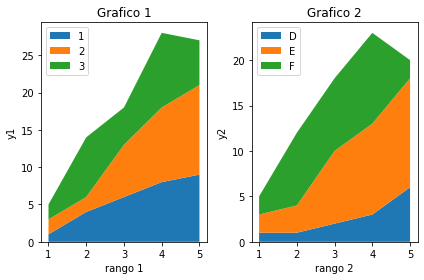

In [241]:
#Rango del eje x
x=range(1,6)

#Datos del eje y en forma de matrices para posteriormente tener una matriz de matrices unica
y1=[ [1,4,6,8,9], [2,2,7,10,12], [2,8,5,10,6] ]
y2=[ [1,1,2,3,6], [2,3,8,10,12], [2,8,8,10,2] ]
y=[y1,y2]

#Diccionario con las configuraciones que nos interesan de cada grafico
dicc1={"labels":["1","2","3"], "title":"Grafico 1", "xlabel":"rango 1", "ylabel":"y1"}
dicc2={"labels":["D","E","F"],"title":"Grafico 2","xlabel":"rango 2","ylabel": "y2"}
dicc={1:dicc1, 2:dicc2}

#Creamos un objeto de la clase StackedAP, ingresando los parametros correspondientes
grafico= StackedAP(x,y,param=dicc,ncols=2)

#Graficamos
grafico.plot()